 ***IMPORTING LIBRARIES***

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**LOAD THE DATASET**

In [117]:
df = pd.read_csv('/content/test.csv',index_col="Formatted_Date")
print(df)

                                     Summary  ...                             Daily_Summary
Formatted_Date                                ...                                          
2016-11-01 00:00:00.000 +0100  Mostly Cloudy  ...  Partly cloudy starting in the afternoon.
2016-11-01 01:00:00.000 +0100  Mostly Cloudy  ...  Partly cloudy starting in the afternoon.
2016-11-01 02:00:00.000 +0100  Partly Cloudy  ...  Partly cloudy starting in the afternoon.
2016-11-01 03:00:00.000 +0100  Partly Cloudy  ...  Partly cloudy starting in the afternoon.
2016-11-01 04:00:00.000 +0100          Clear  ...  Partly cloudy starting in the afternoon.
...                                      ...  ...                                       ...
2016-09-09 19:00:00.000 +0200  Partly Cloudy  ...    Partly cloudy starting in the morning.
2016-09-09 20:00:00.000 +0200  Partly Cloudy  ...    Partly cloudy starting in the morning.
2016-09-09 21:00:00.000 +0200  Partly Cloudy  ...    Partly cloudy starting in t

***EDA (EXPLOTARY DATA ANALYSIS)***

In [118]:
# 1.head of the dataset

print(df.head())

print(df.tail())

print(df.sample(10))

#2.the shape of the dataset

print(df.shape)

#3.list types of all columns

print(df.dtypes)

# 4.info of the dataset

print(df.info())

# 5.summary of the dataset

print(df.describe())

                                     Summary  ...                             Daily_Summary
Formatted_Date                                ...                                          
2016-11-01 00:00:00.000 +0100  Mostly Cloudy  ...  Partly cloudy starting in the afternoon.
2016-11-01 01:00:00.000 +0100  Mostly Cloudy  ...  Partly cloudy starting in the afternoon.
2016-11-01 02:00:00.000 +0100  Partly Cloudy  ...  Partly cloudy starting in the afternoon.
2016-11-01 03:00:00.000 +0100  Partly Cloudy  ...  Partly cloudy starting in the afternoon.
2016-11-01 04:00:00.000 +0100          Clear  ...  Partly cloudy starting in the afternoon.

[5 rows x 11 columns]
                                     Summary  ...                           Daily_Summary
Formatted_Date                                ...                                        
2016-09-09 19:00:00.000 +0200  Partly Cloudy  ...  Partly cloudy starting in the morning.
2016-09-09 20:00:00.000 +0200  Partly Cloudy  ...  Partly cloud

***DATA CLEANING***

In [119]:
#1.drop the duplicates

print(df.shape)

df=df.drop_duplicates()

print(df.shape)

#2.check the NULL values

print(df.isnull().sum())

(2185, 11)
(2185, 11)
Summary                    0
Precip_Type              374
Temperature                0
Apparent_Temperature       0
Humidity                   0
Wind_Speed                 0
Wind_Bearing(degrees)      0
Visibility                 0
Cloud_Cover                0
Pressure                   0
Daily_Summary              0
dtype: int64


***ENCODING(for converting in number format)***

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df.Formatted_Date = le.fit_transform(df.Formatted_Date)
df.Summary = le.fit_transform(df.Summary)
df.Precip_Type = le.fit_transform(df.Precip_Type)
df.Daily_Summary = le.fit_transform(df.Daily_Summary)


print(df.info())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 2185 entries, 2016-11-01 00:00:00.000 +0100 to 2016-09-09 23:00:00.000 +0200
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Summary                2185 non-null   int64  
 1   Precip_Type            2185 non-null   int64  
 2   Temperature            2185 non-null   float64
 3   Apparent_Temperature   2185 non-null   float64
 4   Humidity               2185 non-null   float64
 5   Wind_Speed             2185 non-null   float64
 6   Wind_Bearing(degrees)  2185 non-null   int64  
 7   Visibility             2185 non-null   float64
 8   Cloud_Cover            2185 non-null   int64  
 9   Pressure               2185 non-null   float64
 10  Daily_Summary          2185 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 204.8+ KB
None
           Summary  Precip_Type  ...     Pressure  Daily_Summary
count  2185.000000  2185.000000  ...  2185.000

In [121]:
#removing the not required columns

df.drop('Cloud_Cover', axis=1,inplace= True)
df.drop('Visibility', axis=1,inplace= True)

print(df.columns)

print(df.shape)


Index(['Summary', 'Precip_Type', 'Temperature', 'Apparent_Temperature',
       'Humidity', 'Wind_Speed', 'Wind_Bearing(degrees)', 'Pressure',
       'Daily_Summary'],
      dtype='object')
(2185, 9)


***splitting the dataset***

In [122]:
x = df.iloc[:,0:9].values #input 

y = df.iloc[:,-1].values
print(x)
print(x.shape)

print(y)
print(y.shape)

print(x.ndim)

print(y.ndim)


print(df.head())


from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0,test_size=0.2)

print(x_train.shape)

print(x_test.shape)

print(y_train.shape)

print(y_test.shape)

[[6.00000000e+00 1.00000000e+00 6.20555556e+00 ... 2.97000000e+02
  1.02174000e+03 2.00000000e+01]
 [6.00000000e+00 1.00000000e+00 5.82777778e+00 ... 2.96000000e+02
  1.02169000e+03 2.00000000e+01]
 [8.00000000e+00 1.00000000e+00 5.31111111e+00 ... 2.98000000e+02
  1.02161000e+03 2.00000000e+01]
 ...
 [8.00000000e+00 0.00000000e+00 2.20388889e+01 ... 3.00000000e+01
  1.01566000e+03 2.40000000e+01]
 [8.00000000e+00 0.00000000e+00 2.15222222e+01 ... 2.00000000e+01
  1.01595000e+03 2.40000000e+01]
 [8.00000000e+00 0.00000000e+00 2.04388889e+01 ... 3.90000000e+01
  1.01616000e+03 2.40000000e+01]]
(2185, 9)
[20 20 20 ... 24 24 24]
(2185,)
2
1
                               Summary  Precip_Type  ...  Pressure  Daily_Summary
Formatted_Date                                       ...                         
2016-11-01 00:00:00.000 +0100        6            1  ...   1021.74             20
2016-11-01 01:00:00.000 +0100        6            1  ...   1021.69             20
2016-11-01 02:00:00.000 +0

***FEATURE SCALLING***

In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[-0.04964282 -0.48781179 -0.24650779 ... -0.11146124 -0.12509013
  -0.48967137]
 [-0.04964282 -0.48781179 -0.43081413 ... -0.06933492  0.02597337
   1.15735235]
 [-0.04964282 -0.48781179  1.39885948 ...  0.94169689 -0.27386479
  -0.48967137]
 ...
 [-0.04964282 -0.48781179  0.9467576  ... -0.52219292 -2.04313884
   1.15735235]
 [-0.04964282  2.04997096 -0.57573877 ...  1.22604959  0.61191665
  -0.86975377]
 [-0.04964282 -0.48781179 -1.13259595 ... -0.1957139   0.16101498
  -0.48967137]]


***MACHINE LEARNING MODELS***

[13 26 11 24 13 13 13 20 24 13 13 13 28 17  9 24 26 25 17 13 26 20 13 13
  7 26 26 26  6 26 13 13 24  0 22 26  1  0 27  7 26 13 13 28 25  5 28 26
 13 13 20 26 15 13 13 13 13 13 13 28 26 26 28 13 20 10 19 24 18 13 27 13
 13 13 13  6 13 13 13 13 11 14 26  7 13 13  7 26 13 26 13 13 28 24 13 26
 26 17 24 13 20  7 11 26 13 13 26 29 15 26 24  4 13 26  7 21 17  0  6  2
 28 23 27 13 13 13 26 13 13 24 23  0 24 28 26  0  5 11 26 13 15 24 26 13
 28 13  4 26 26 26 13 13  3  4 17 13 16  0 13  3 13 27 26 20 13 13  8 23
 28 24 13 13  0 13  2 13 13 19 13 26 26  7 13 21 26 13 17 26  8 13 24 13
 13 16  5 26 13 13 13 26  4 31 10 26 26 18 20 13  0 13 13 13 26  3 11  6
 26 26 13 24  6 21 13 13 28 13 12 26 13 13 13 22  5 28 19  9 13  8 13 13
 26 20 24 13  9 27 13 11 24 13 13 13 26 26 17 24 24  0 13 26 13 13 13 26
 17  3 27 17 29 13 20 25 13 13 20 13 11 13 16 26 28 13 29 20 26 19 13 10
 26 10 24  2 31  9 26 20 11 28  6 13 19 27 28 13 13 13 13 28 13 26 13 20
 24 11 28 13 26  9  0 20 13 13 20 24 13 13 19 26 13

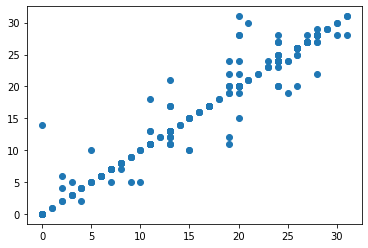

     Actual  Predicted
0        13         13
1        26         26
2        13         11
3        24         24
4        13         13
..      ...        ...
432       8          8
433      24         24
434      26         26
435      10         15
436      13         13

[437 rows x 2 columns]
[13 27 13 25 13 13 13 15 20 13 13 13 29 17  9 28 27 19 17 13 27 29 13 13
  6 27 27 27  6 27 11 13 25  1 23 27  1  1 28  6 27 11 13 28 25  5 29 27
 13 13 31 27 15 13 13 13 13 13 13 30 26 27 23 13 20  5 25 20 18 13 28 13
 13 17 13  6 13 11 13 13 11 14 27  5 12 12  6 27 13 27 13 13 29 25 13 27
 27 17 25 13 20  6 13 27 13 13 27 30 15 27 20  4 13 27  6 20 17  1  6  2
 29 24 28 13 13 13 27 13 13 26 24  1 25 29 27  1  5 11 27 13 10 25 27 13
 29 13  4 27 27 27 13 13  3  4 17 13 16  1 13  5 13 29 27 20 13 13  8 24
 29 25 13 13  1 13  6 13 13 20 13 27 27  6 13 20 27 13 17 27  8 13 25 13
 13 16 10 27 20 13 13 27  2 31 10 27 27 18 20 13 14 13 13 13 27  3 11  6
 27 27 13 26  6 31 13 13 29 13 12 27 13 17 

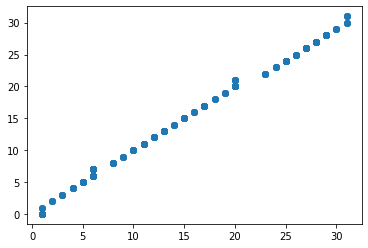

     Actual  Predicted
0        13         13
1        26         27
2        13         13
3        24         25
4        13         13
..      ...        ...
432       8          8
433      24         25
434      26         27
435      10         10
436      13         13

[437 rows x 2 columns]
[13 26 13 24 13 13 13 20 24 13 13 13 28 17  9 24 26 24 17 13 26 28 13 13
  7 26 26 26  6 26 13 13 24  0 24 26  1  0 28  8 26 13 13 28 26  5 28 26
 13 13 31 26 15 13 13 13 13 13 13 28 26 26 26 13 20  5 24 24 18 13 28 13
 13 17 13  6 13 13 13 13 13 14 26  7 13 13  7 26 13 26 13 13 28 24 13 26
 26 17 24 13 20  7 11 26 13 13 26 29 15 26 24  4 13 26  7 21 17  0  6  2
 28 24 28 13 13 13 26 13 13 24 23  0 24 28 26  0  5 11 26 13 15 24 26 13
 28 13  4 26 26 26 13 13  3  4 17 13 16  0 13  3 13 28 26 20 13 13  8 24
 28 24 13 13  0 13  6 13 13 20 13 26 26  8 13 21 26 13 17 26  8 13 24 13
 13 16  5 26 13 13 13 26  2 31 15 26 26 18 20 13 14 13 13 13 26  3 11  6
 26 26 13 24  6 21 13 13 28 13 12 26 13 16 

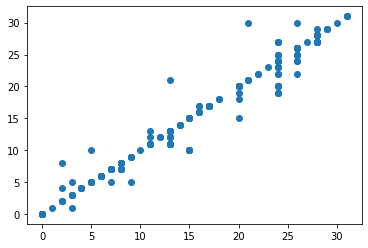

     Actual  Predicted
0        13         13
1        26         26
2        13         13
3        24         24
4        13         13
..      ...        ...
432       8          8
433      24         24
434      26         26
435      10         15
436      13         13

[437 rows x 2 columns]
[13 27 13 25 13 13 13 15 20 13 13 13 29 17  9 28 27 19 17 13 27 29 13 13
  7 27 27 27  6 27 11 13 25  0 23 27  1  0 28  7 27 11 13 28 25  5 29 27
 13 13 31 27 15 13 13 13 13 13 13 30 26 27 23 13 20  5 25 20 18 13 28 13
 13 17 13  6 13 11 13 13 11 14 27  5 12 12  7 27 13 27 13 13 29 25 13 27
 27 17 25 13 20  7 13 27 13 13 27 30 15 27 20  4 13 27  7 21 17  0  6  2
 29 24 28 13 13 13 27 13 13 26 24  0 25 29 27  0  5 11 27 13 10 25 27 13
 29 13  4 27 27 27 13 13  3  4 17 13 16  0 13  5 13 29 27 20 13 13  8 24
 29 25 13 13  0 13  6 13 13 20 13 27 27  7 13 21 27 13 17 27  8 13 25 13
 13 16 10 27 21 13 13 27  2 31 10 27 27 18 20 13 14 13 13 13 27  3 11  6
 27 27 13 26  6 31 13 13 29 13 12 27 13 17 

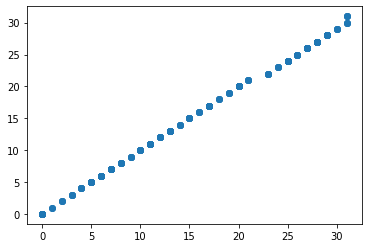

     Actual  Predicted
0        13         13
1        26         27
2        13         13
3        24         25
4        13         13
..      ...        ...
432       8          8
433      24         25
434      26         27
435      10         10
436      13         13

[437 rows x 2 columns]


In [124]:
#KNeighborsclassifier (KNN)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print(knn_pred)

print(y_test)   #real output
plt.scatter(knn_pred,y_test)
plt.show()

df1 = pd.DataFrame({'Actual' : y_test , 'Predicted' : knn_pred })
print(df1)


#Naive-Bayes classifier

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)
print(nb_pred)

print(y_test)   #real output
plt.scatter(nb_pred,y_test)
plt.show()

df2 = pd.DataFrame({'Actual' : y_test , 'Predicted' : nb_pred })
print(df2)

#Support vector Machine (SVM)
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
sv_pred=sv.predict(x_test)
print(sv_pred)

print(y_test)   #real output
plt.scatter(sv_pred,y_test)
plt.show()

df3 = pd.DataFrame({'Actual' : y_test , 'Predicted' : sv_pred })
print(df3)

#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print(dt_pred)

print(y_test)   #real output
plt.scatter(dt_pred,y_test)
plt.show()

df4 = pd.DataFrame({'Actual' : y_test , 'Predicted' : dt_pred })
print(df4)

PREDICTED VALUE VS ACTUAL VALUES

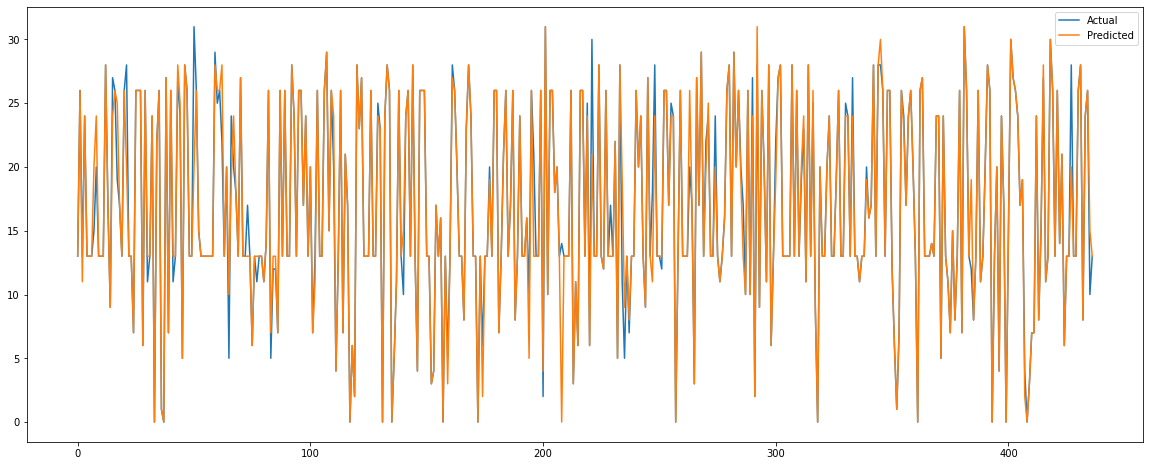

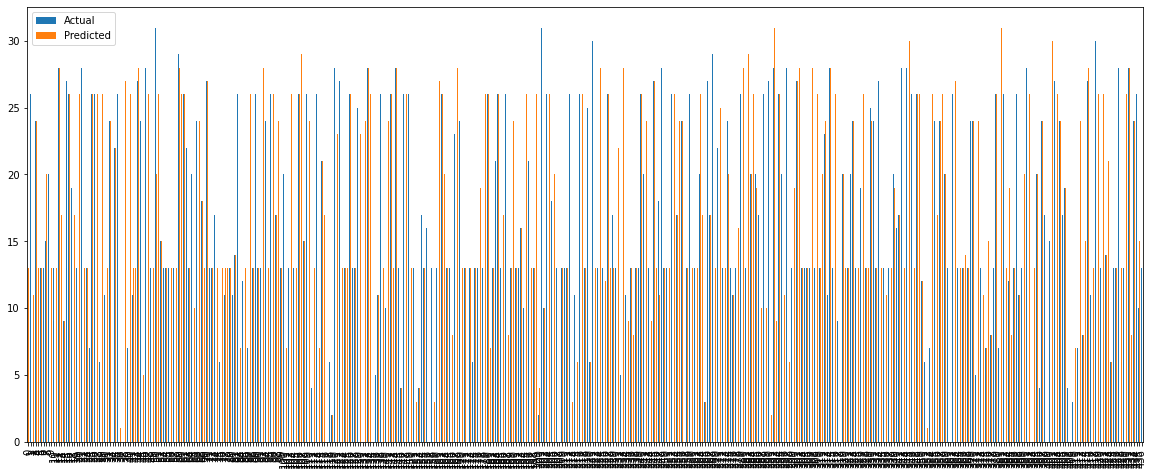

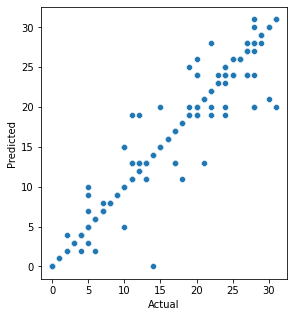

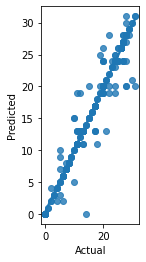

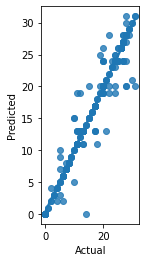

In [125]:
#line graph representation comparing predicted v actual values
df1.plot(figsize=(20,8))
plt.show()

#line graph representation comparing predicted v actual values
df1.plot(figsize=(20,8),kind='bar')
plt.show()


#Regression plot in seaborn 
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x='Actual', y = 'Predicted', data = df1)
plt.show()
plt.subplot(1,3,2)
sns.regplot(x='Actual', y = 'Predicted', data = df1)
plt.show()

plt.subplot(1,3,3)
sns.regplot(x='Actual', y = 'Predicted', data = df1)
plt.show()

****MODEL EVALUATION***

In [126]:
# #classification matrics

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,knn_pred)*100)
print(accuracy_score(y_test,nb_pred)*100)
print(accuracy_score(y_test,sv_pred)*100)
print(accuracy_score(y_test,dt_pred)*100)

# confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,knn_pred)*100)
print(confusion_matrix(y_test,nb_pred)*100)
print(confusion_matrix(y_test,sv_pred)*100)
print(confusion_matrix(y_test,dt_pred)*100)

#R2-SCORE

from sklearn.metrics import r2_score
print(r2_score(y_test,knn_pred)*100)
print(r2_score(y_test,nb_pred)*100)
print(r2_score(y_test,sv_pred)*100)
print(r2_score(y_test,dt_pred)*100)

84.89702517162472
59.03890160183066
83.98169336384439
65.67505720823799
[[1300    0    0 ...    0    0    0]
 [   0  200    0 ...    0    0    0]
 [   0    0  200 ...    0    0    0]
 ...
 [   0    0    0 ...  300    0    0]
 [   0    0    0 ...    0  200    0]
 [   0    0    0 ...    0    0  200]]
[[   0 1300    0 ...    0    0    0]
 [   0  200    0 ...    0    0    0]
 [   0    0  300 ...    0    0    0]
 ...
 [   0    0    0 ...    0  400    0]
 [   0    0    0 ...    0    0  300]
 [   0    0    0 ...    0    0  300]]
[[1300    0    0 ...    0    0    0]
 [   0  100    0 ...    0    0    0]
 [   0    0  300 ...    0    0    0]
 ...
 [   0    0    0 ...  300    0    0]
 [   0    0    0 ...    0  100    0]
 [   0    0    0 ...    0    0  300]]
[[1300    0    0 ...    0    0    0]
 [   0  200    0 ...    0    0    0]
 [   0    0  300 ...    0    0    0]
 ...
 [   0    0    0 ...    0  400    0]
 [   0    0    0 ...    0    0  300]
 [   0    0    0 ...    0    0  300]]
95.2947717725138

***DATA VISUALISATION***

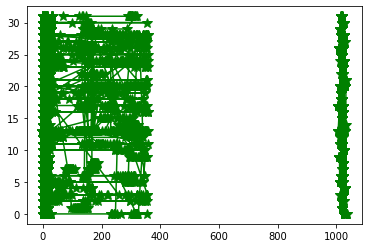

In [127]:
plt.plot(x,y,color = 'g',marker = "*",markersize = 10)
plt.show()